In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Inference of Parameters in Parametric Models

In this lab, we will look at estimating parameters based on observation of data points and deepen our understanding of error estimates.

## Estimating the parameters of Gaussian Data

We will generate $n$ data points, which are i.i.d. realizations of a random variable $X$ that follows a normal distribution, i.e. $X\sim\mathcal{N}(\mu, \sigma^2)$.


$$p(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ - \frac{(x - \mu)^2}{2\sigma^2} }$$


### Data generation

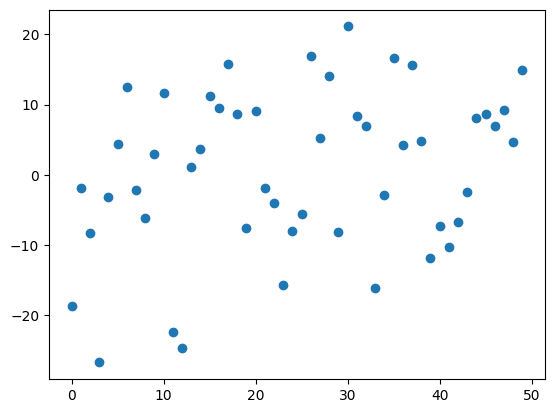

In [21]:
# Mean of the distribution
mu = 1

# Standard deviation of the distribution
sigma = 10

# Number of data points to generate
num_samples = 50

# Generate 50 synthetic data points from the Normal Distribution
data = np.random.normal(loc=mu, scale=sigma, size=num_samples)
#print(data)

#Visualization of the datapoints
plt.plot(data,'o')
plt.show()

In the previous lesson, we examined the point estimators $\hat\mu$ and $\hat\sigma^2$, which stand for $\mu$ and $\sigma^2$, respectively. The expressions for these estimators are given by:
$$\hat\mu = \bar X$$
and
$$\hat\sigma^2 = S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar X)^2$$
Both of these estimators are unbiased and consistent.


We also obtained that the Maximum Likelihood Estimation (MLE) estimator for $\sigma^2$ was
$$\hat \sigma_\mathrm{MLE}=\frac{1}{n}\sum_{i=1}^n (X_i-\bar X)^2$$
which, on the contrary to $\hat\sigma$ is biased, but it is better with respect to the MSE criterion.

**Exercise:** Let us now construct a function that uses these formulas to estimate $\hat\mu$, $\hat\sigma^2$ and $\hat \sigma_\mathrm{MLE}$ using a vector of data points.

In [22]:
def gaussian_parameters(data):
    n = len(data)
    data = np.array(data)
    
    hat_mu = np.sum(data) / n
    hat_sigma2 = np.sum(np.square(data - hat_mu)) / (n-1)
    hat_sigma2_mle = np.sum(np.square(data - hat_mu)) / n
    
    return hat_mu, hat_sigma2, hat_sigma2_mle
    


hat_mu, hat_sigma2, hat_sigma2_mle = gaussian_parameters(data)

print("Estimation of hat_mu: {:.4f}".format(hat_mu),", True mu: {:.4f}".format(mu))
print("Estimation of hat_sigma^2: {:.4f}".format(hat_sigma2),", True sigma^2: {:.4f}".format(sigma**2))
print("MLE estimation of hat_sigma^2: {:.4f}".format(hat_sigma2_mle),", True sigma^2: {:.4f}".format(sigma**2))


Estimation of hat_mu: 0.6856 , True mu: 1.0000
Estimation of hat_sigma^2: 132.2165 , True sigma^2: 100.0000
MLE estimation of hat_sigma^2: 129.5722 , True sigma^2: 100.0000


**Exercise:** Visualize the data in a histogram and compare it with the true and inferred distribution. Rerun the experiment several times to see how it changes.

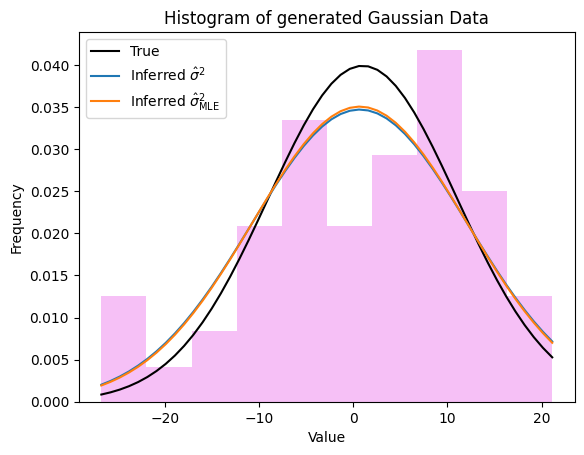

In [23]:
# Original Gaussian Function
def gauss(x,mu,sigma2):
    return 1./np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))


# Inferred parameters = hat_mu, hat_sigma2, hat_sigma2_mle
hat_mu, hat_sigma2, hat_sigma2_mle = gaussian_parameters(data)

# Visualizing the generated data using a histogram
plt.hist(data, bins=10, align='mid', density=True, alpha=0.5, color='violet')

# Add a title
plt.title('Histogram of generated Gaussian Data')

x=np.linspace(np.min(data),np.max(data))
plt.plot(x, gauss(x, mu, sigma**2), color = 'black', label = 'True')
plt.plot(x, gauss(x, hat_mu, hat_sigma2), label = r'Inferred $\hat\sigma^2$')
plt.plot(x, gauss(x, hat_mu, hat_sigma2_mle), label = r'Inferred $\hat\sigma^2_\mathrm{MLE}$')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()


If now you rerun the experiment (you generate a new dataset) and recompute the estimators, you will obtain different values for all three estimators. The estimators are random variables themselves. The important question is being able to quantify the degree of error to the estimates obtained.

###  Investigating the sampling distribution

**Exercise:** Admitting that $\text{Var}(S^2)=2\sigma^4/(n-1)$.

Compute the Bias (bias = sesgo = error between true parameters and estimated ones) and the MSE for both estimators $\hat\sigma^2$ and $\hat\sigma^2_{\text{MLE}}$, as a function of $n$. Which of the two estimators for $\sigma^2$ has smaller MSE (Mean Squared Error)?




For any parameter $\theta$ and data $ X_{i} $ where $ i \in [1,...,n] $, we know that:

1. $$ S^2 = \frac{1}{n-1}\sum_{i=1}^{n} (X_{i} - \bar{X})^2 $$

2. $$ \text{Var}(S^2) = \text{Var}(\hat\sigma^2)= \frac{2\sigma^4}{n-1} $$

3. $$ \text{MSE} = E[ (\hat\theta - \theta)^2 ] $$

4. $$ \text{Bias} = E[ (\hat\theta - \theta) ]$$

5. $$ E[S^2] = E[\sigma^2] = \sigma^2 $$

6. $$ \text{MSE}(\theta^2) = {Bias}^2(\theta^2) + \text{Var}(\theta^2) $$

We have to compute the Bias and MSE of the following parameters:

1. $$ Bias(\hat\sigma^2) $$

2. $$ Bias(\hat\sigma_{MLE}^2) $$

3. $$ MSE(\hat\sigma^2) $$

4. $$ MSE(\hat\sigma_{MLE}^2) $$

5. $$ Bias(\hat\mu) $$

6. $$ MSE(\hat\mu) $$

The calculations are the following:

$$ \text{1. } Bias(\hat\sigma^2) = E[ (\hat\sigma^2 - \sigma^2) ] $$

$\hspace{10cm} = E[ (\hat\sigma^2) ] - \sigma^2 $

$\hspace{10cm} =_{E[ (\hat\sigma^2) ] = \sigma^2} 0$


$$ \text{2. } Bias(\hat\sigma_{MLE}^2) = E[ (\hat\sigma_{MLE}^2 - \sigma^2) ] $$

$\\hspace{10cm} = E[ \frac{n-1}{n}S^2] - \sigma^2 $

$\hspace{10cm} = \frac{n-1}{n}E[S^2] - \sigma^2 $

$\hspace{10cm} =_{E[S^2] = \sigma^2 } \frac{n-1}{n}\sigma^2 - \sigma^2 $

$\hspace{10cm} = \frac{-\sigma^2}{n} $


$$ \text{3. } MSE(\hat\sigma^2) = {Bias}^2(\hat\sigma^2) + \text{Var}(\hat\sigma^2) $$

$\hspace{10cm} =_{{Bias}^2(\hat\sigma^2) = 0} \text{Var}(\hat\sigma^2) $

$\hspace{10cm} = \frac{2\sigma^4}{n-1}$



$$ \text{4. } MSE(\hat\sigma_{MLE}^2) = {Bias}^2(\hat\sigma_{MLE}^2) + \text{Var}(\hat\sigma_{MLE}^2) $$

$\hspace{10cm} =_{{Bias}^2(\hat\sigma_{MLE}^2) = \frac{(-\sigma^2)^2}{n^2}} \frac{\sigma^4}{n^2} + \text{Var}(S^2[\frac{n-1}{n}]) $

$\hspace{10cm} = \frac{\sigma^4}{n^2} + [\frac{(n-1)^2}{n^2}]\text{Var}(S^2) $

$\hspace{10cm} = \frac{\sigma^4}{n^2} + [\frac{(n-1)^2}{n^2}]\frac{2\sigma^4}{n-1} $

$\hspace{10cm} = \frac{\sigma^4}{n^2} + \frac{2\sigma^4(n-1)}{n^2} $

$\hspace{10cm} = \frac{\sigma^4+2\sigma^4(n-1)}{n^2} $

$\hspace{10cm} = \frac{\sigma^4+2\sigma^4n-2\sigma^4}{n^2} $

$\hspace{10cm} = \frac{2\sigma^4n-\sigma^4}{n^2} $

$\hspace{10cm} = [\frac{2n-1}{n^2}]\sigma^4 $


$$ \text{5. } Bias(\hat\mu) = E[\hat\mu - \mu]^2 $$

$\hspace{10cm} = E[\frac{1}{n}\sum_{i=1}^{n} X_{i} - \mu] $

$\hspace{10cm} = \frac{1}{n}E[\sum_{i=1}^{n} X_{i}] - \mu $

$\hspace{10cm} = \frac{1}{n}\sum_{i=1}^{n}E[X_{i}] - \mu $

$\hspace{10cm} = \frac{1}{n}[n\mu] - \mu = 0$


$$ \text{6. } MSE(\hat\mu) =  {Bias}^2(\hat\mu) + \text{Var}(\hat\mu)$$

$\hspace{10cm} =_{{Bias}^2(\hat\mu) = 0} + \text{Var}(\frac{1}{n}\sum_{i=1}^{n} X_{i})  $

$\hspace{10cm} = \frac{1}{n^2}\text{Var}(\sum_{i=1}^{n} X_{i}) $

$\hspace{10cm} = \frac{1}{n^2}\sum_{i=1}^{n} \text{Var}(X_{i}) $

$\hspace{10cm} = \frac{1}{n^2}[n\sigma^2] = \frac{\sigma^2}{n} $


Which of the two estimators for $\sigma^2$ has smaller MSE (Mean Squared Error)?

Let's solve the following inequality, for n $\geq$ 2:

$$ \frac{2}{n-1} > \frac{2n-1}{n^2} $$

$\hspace{1.5cm} \Longleftrightarrow 2n^2 > (n-1)(2n-1)$

$\hspace{1.5cm} \Longleftrightarrow 2n^2 > 2n^2-3n+1 $ 

$\hspace{1.5cm} \Longleftrightarrow 3n > 1$

Therefore, the estimator $ \hat\sigma_{MLE}^2 $ has the smallest MSE between $ \hat\sigma^2 $ and $ \hat\sigma_{MLE}^2$ .

**Exercise 3: Sampling distribution:** Which is the expected sampling distribution for the three estimators?

For this goal, recall that we are dealing with multiple independent realizations of a random variable $X\sim \mathcal{N}(\mu,\sigma^2)$. 

In this context, you can use first the fact that the sum of two randomly distributed random variables $X$ and $Y$ is also Gaussianly distributed and
$$X\sim \mathcal{N}\left(\mu_X,\sigma_X^2\right)$$
$$Y\sim \mathcal{N}\left(\mu_Y,\sigma_Y^2\right)$$
then
$$Z=X+Y\sim \mathcal{N}\left(\mu_X+\mu_Y,\sigma_X^2+\sigma_Y^2\right)$$
and use it to obtain the distribution of $\bar X$

For the variance estimates, you should use the Cochran's theorem. If $Z_1,\ldots, Z_n$ are independent i.i.d., standard normal random variables, i.e. $Z_i\sim \mathcal{N}\left(0,1\right)$, then
$$Z=\sum_{i=1}^n \left( Z_i-\bar X\right)^2 \sim \chi^2 (n-1)$$
with $\chi^2(n-1)$ being the $\chi^2$ function with $n-1$ degrees of freedom.

We need to determine the sampling distribution for each of the 3 estimators: $\hat\mu (= \bar X)$, $\hat\sigma^2$ and $\hat\sigma_{MLE}^2$ .

1. Distribution for the Mean $\hat\mu$ .

Let's assume that every random variable $ X_{i}, i \in [1,..., n] $ follows the same normal distribution with parameters $ \mu $ and $ \sigma^2 $, that is:

$$ X_{i} \sim \mathcal{N} (\mu,\sigma^2) $$

Then, as explained in the previous paragraph, the sum of randomly distributed independent variables $ X_{i}, i \in [1,..., n] $ is also Gaussianly distributed.
Therefore, denoting Y the new random variable, let's determine the mean and variance:

$$ Y := \sum_{i=1}^{n} \frac{X_{i}}{n} $$

$$ \text{Mean}(Y) = \mu_{Y} = \text{Mean}(\sum_{i=1}^{n} \frac{X_{i}}{n})= \frac{1}{n}[\sum_{i=1}^{n} \text{Mean}(X_{i})] = \frac{1}{n}[\underbrace{\mu + ... + \mu}_{\text{n times}}] = \mu $$

$$ \text{Var}(Y) = \sigma_{Y}^2 = \text{Var}(\sum_{i=1}^{n} \frac{X_{i}}{n})= \frac{1}{n^2}[\sum_{i=1}^{n} \text{Var}(X_{i})] = \frac{1}{n^2}\underbrace{[\sigma^2 + ... + \sigma^2]}_{\text{n times}} = \frac{1}{n^2}[n\sigma^2] = \frac{\sigma^2}{n}$$

Consequently, we obtain that:

$$ Y = \sum_{i=1}^{n} \frac{X_{i}}{n} \sim \mathcal{N} (\mu, \frac{\sigma^2}{n}) $$


2. Distribution for the Variance $\hat\sigma^2$ .

In order to find the distribution that follows: $$ \hat\sigma^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar X)^2 $$ We need to make use of Cochran's Theorem. First of all, let's notice that: $$ X_{i} - \bar{X} = \sigma[\frac{X_{i}-\bar{X}}{\sigma}]$$

Therefore, denoting $ Z_{i} := \frac{X_{i}-\bar{X}}{\sigma}$, we obtain that: 

$$ [X_{i} - \bar{X}]^2 = \sigma^2[\frac{X_{i}-\bar{X}}{\sigma}]^2 = \sigma^2Z_{i}^2 $$

Then, considering the sum of all independent random variables, we have:

$$ \hat\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} [X_{i}-\bar{X}]^2 = [\frac{\sigma^2}{n-1}]\sum_{i=1}^{n} Z_{i}^2 $$ 

Thanks to Cochran's Theorem we know that:

$$ \sum_{i=1}^{n} Z_{i}^2 \sim \chi^2(n-1)$$

Then, applied to our case, we have that:

$$ \hat\sigma^2 = [\frac{\sigma^2}{n-1}]\sum_{i=1}^{n} Z_{i}^2 \sim [\frac{\sigma^2}{n-1}]\chi^2(n-1) $$

$$ \Longleftrightarrow Z := [\frac{n-1}{\sigma^2}]\hat\sigma^2 \sim \chi^2(n-1) $$ 



3. Distribution for the Maximum Likelihood Estimator $\hat\sigma_{MLE}^2$ .

As it can be noticed, in order to determine the distribution that follows the MLE, we have to proceed exactly the same way as for $ \hat\sigma^2 $ with the sole exception that, instead of dividing by $(n-1)$ we divide by $n$.

$$ \hat\sigma_{MLE}^2 = \frac{1}{n}\sum_{i=1}^n (X_i - \bar X)^2$$

Therefore, we obtain that:

$$ \hat\sigma_{MLE}^2 = [\frac{\sigma^2}{n}]\sum_{i=1}^{n} Z_{i}^2 \sim [\frac{\sigma^2}{n}]\chi^2(n-1) $$

$$ \Longleftrightarrow [\frac{n}{\sigma^2}]\hat\sigma_{MLE}^2 \sim \chi^2(n-1) $$

**Exercise: Empirically estimation of the sampling distribution** Repeat the experiment $N=10^4$ times and save the value of the estimators obtained in each trial in a vector. Repeat this using different dataset sizes $n=10,100,1000,10^4$.

In [24]:
N = 10000

list_num_samples = np.array([10,100,1000,10000])

# Creation of 3 Numpy arrays with 4 dim and 10 000 zeros in each
xmu, xs2, xs2_mle = np.zeros((3,len(list_num_samples), N))

# In each array, we store the values of the average, variance and variance with the MLE criterion
for i,n in enumerate(list_num_samples):
    for t in range(N):
        data = np.random.normal(loc=mu, scale=sigma, size=n)
        hmu, hsigma2, hsigma2_mle = gaussian_parameters(data)

        xmu[i,t] = hmu
        xs2[i,t] = hsigma2
        xs2_mle[i,t] = hsigma2_mle


**Exercise:** Compare empirical estimation of the bias and MSE as a function of $n$ with the
with the theoretical ones obtained above

Let's remember that:

1. $ \text{Bias} = E[ (\hat\theta - \theta) ]$

2. $ \text{MSE} = E[ (\hat\theta - \theta)^2 ] $

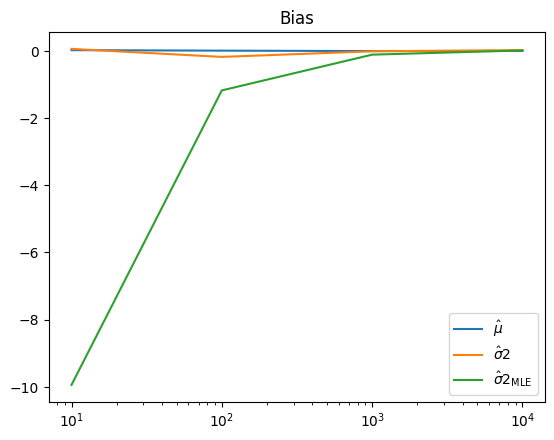

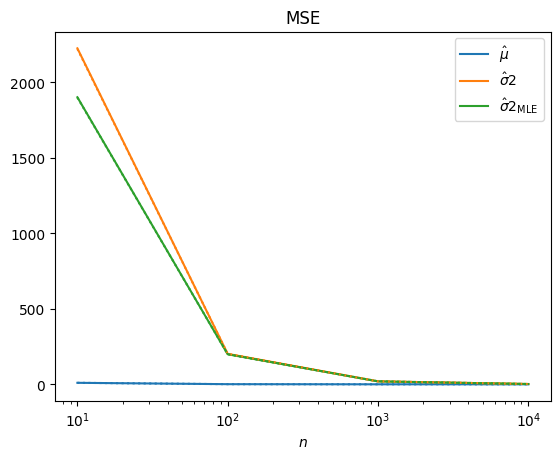

In [25]:
bias_mu, bias_sigma2 ,bias_sigma2_mle = np.zeros((3,len(list_num_samples)))
mse_mu, mse_sigma2, mse_sigma2_mle = np.zeros((3,len(list_num_samples)))

for i,n in enumerate(list_num_samples):
    
    bias_mu[i] = np.average(xmu[i]-mu)
    bias_sigma2[i] = np.average(xs2[i]- sigma**2)
    bias_sigma2_mle[i] = np.average(xs2_mle[i]-sigma**2)
    
    mse_mu[i] = np.average((xmu[i]-mu)**2)
    mse_sigma2[i] = np.average((xs2[i]-sigma**2)**2)
    mse_sigma2_mle[i] = np.average((xs2_mle[i]-sigma**2)**2)

# Creation of arrays for the theoretical values of mu, sigma^2 and sigma_{MLE}^2
theoretical_bias_mu, theoretical_bias_sigma2, theoretical_bias_sigma2_mle = np.zeros((3, len(list_num_samples)))
theoretical_mse_mu, theoretical_mse_sigma2, theoretical_mse_sigma2_mle = np.zeros((3, len(list_num_samples)))

# We compute the theoretical values of mu, sigma^2 and sigma_{MLE}^2 according to the theory previously proven
for i, n in enumerate(list_num_samples):
    theoretical_bias_mu[i] = 0  
    theoretical_bias_sigma2[i] = 0 
    theoretical_bias_sigma2_mle[i] = (-sigma**2) / (n)
    theoretical_mse_mu[i] = sigma**2 / n
    theoretical_mse_sigma2[i] = 2*sigma**4 / (n-1)
    theoretical_mse_sigma2_mle[i] = ((2*n -1) / (n**2))*sigma**4

plt.title('Bias')
plt.plot(list_num_samples, bias_mu, color='C0', label=r'$\hat\mu$')
plt.plot(list_num_samples, bias_sigma2, color='C1', label=r'$\hat\sigma2$')
plt.plot(list_num_samples, bias_sigma2_mle, color='C2', label=r'$\hat\sigma2_\mathrm{MLE}$')


plt.xscale('log')

plt.legend()
plt.show()


plt.title('MSE')
plt.plot(list_num_samples,mse_mu,label=r'$\hat\mu$',color='C0')
plt.plot(list_num_samples,mse_sigma2,label=r'$\hat\sigma2$',color='C1')
plt.plot(list_num_samples,mse_sigma2_mle,label=r'$\hat\sigma2_\mathrm{MLE}$',color='C2')
plt.xlabel(r'$n$')


plt.plot(list_num_samples, theoretical_mse_mu, ':', color='C0')
plt.plot(list_num_samples, theoretical_mse_sigma2, ':', color='C1')
plt.plot(list_num_samples, theoretical_mse_sigma2_mle, ':', color='C2')


plt.xlabel(r'$n$')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()

**Exercise:** Compare the density histograms of the estimators obtained for each value of $n$.

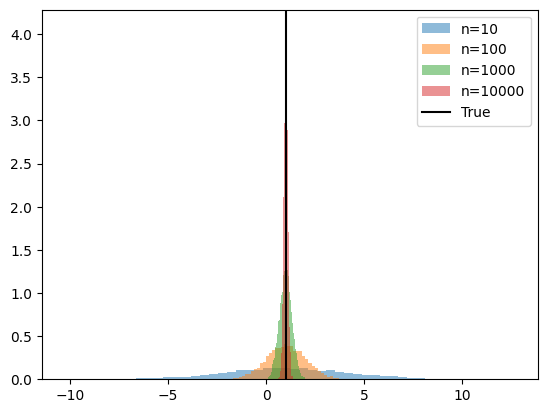

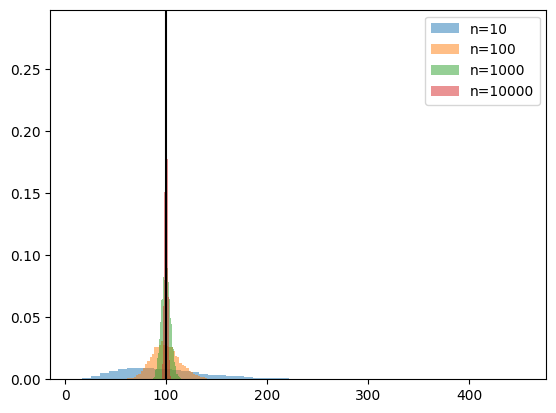

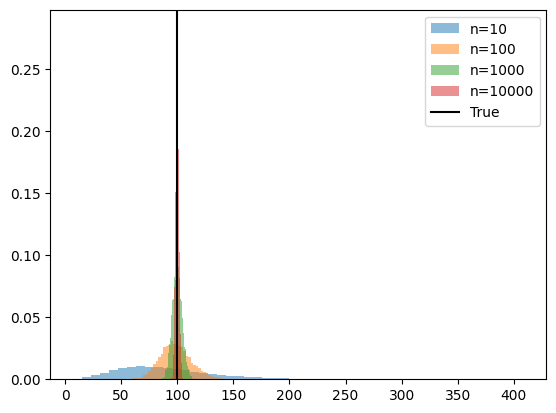

In [26]:
for i,n in enumerate(list_num_samples):
    plt.hist(xmu[i],bins=50,alpha=0.5,color='C'+str(i),label='n='+str(n),density=True)
    x=np.array(xmu[i])
    
plt.axvline(x=mu,color='black',label='True')
plt.legend()
plt.show()

for i,n in enumerate(list_num_samples):
    plt.hist(xs2[i],bins=50,alpha=0.5,color='C'+str(i),label='n='+str(n),density=True)
plt.legend()
plt.axvline(x=sigma**2,color='black',label='True')
plt.show()

for i,n in enumerate(list_num_samples):
    plt.hist(xs2_mle[i],bins=50,alpha=0.5,color='C'+str(i),label='n='+str(n),density=True)
    
plt.axvline(x=sigma**2,color='black',label='True')
plt.legend()
plt.show()

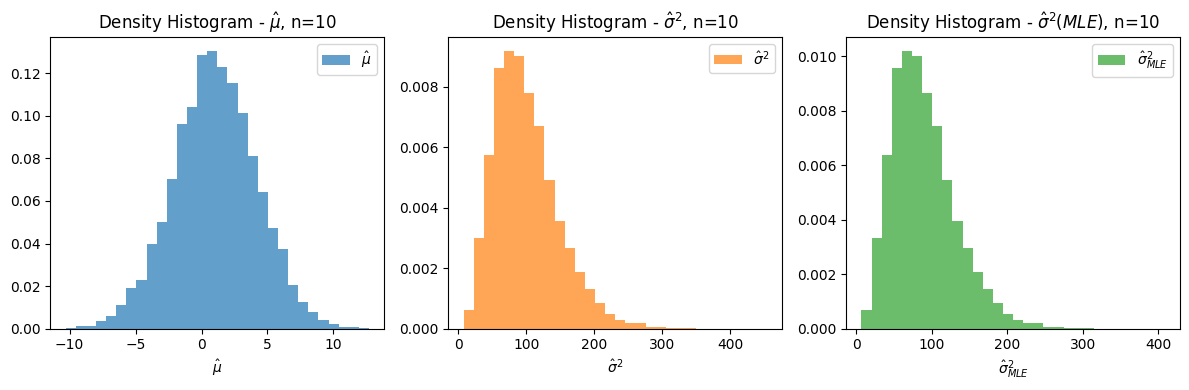

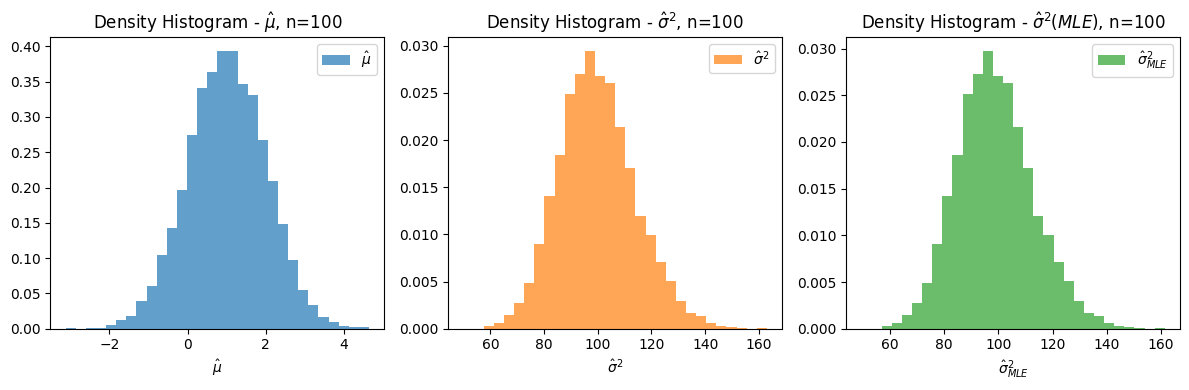

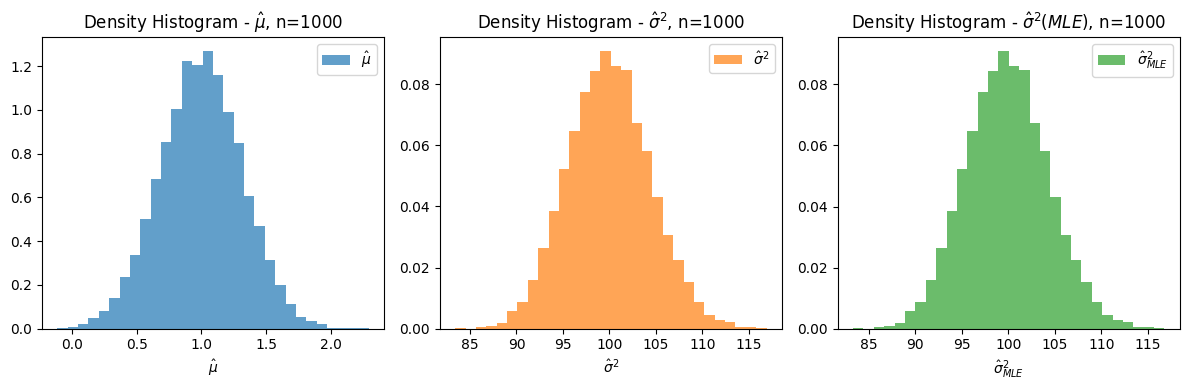

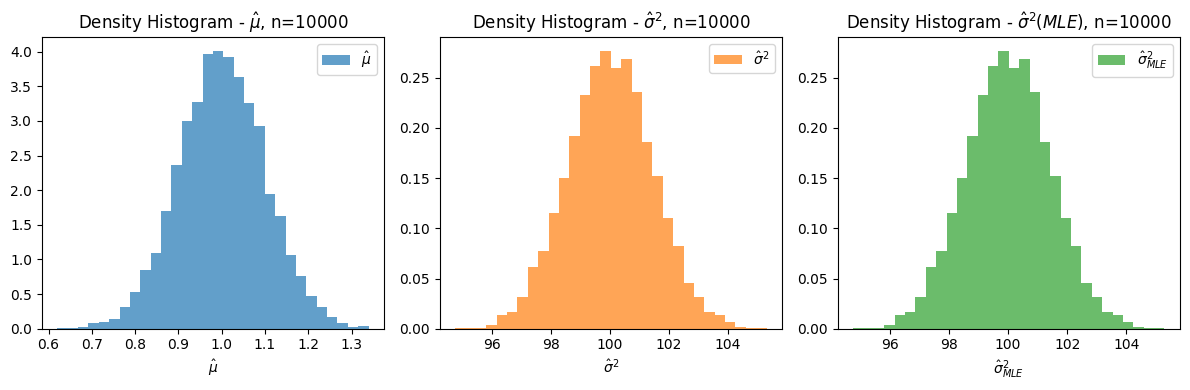

In [27]:
# Plot density histograms for each estimator and each value of n
for i, n in enumerate(list_num_samples):
    plt.figure(figsize=(12, 4))

    # Plotting the histogram for mu
    # By including the parameter: density=True, we force Python to write a normalized histogram
    plt.subplot(1, 3, 1)
    plt.hist(xmu[i], bins=30, density=True, alpha=0.7, color='C0', label=r'$\hat\mu$')
    plt.title(f'Density Histogram - $\hat\mu$, n={n}')
    plt.xlabel(r'$\hat\mu$')
    plt.legend()

    # Plotting the histogram for sigma^2
    plt.subplot(1, 3, 2)
    plt.hist(xs2[i], bins=30, density=True, alpha=0.7, color='C1', label=r'$\hat\sigma^2$')
    plt.title(f'Density Histogram - $\hat\sigma^2$, n={n}')
    plt.xlabel(r'$\hat\sigma^2$')
    plt.legend()

    # Plotting the histogram for sigma^2_MLE
    plt.subplot(1, 3, 3)
    plt.hist(xs2_mle[i], bins=30, density=True, alpha=0.7, color='C2', label=r'$\hat\sigma^2_{MLE}$')
    plt.title(f'Density Histogram - $\hat\sigma^2(MLE)$, n={n}')
    plt.xlabel(r'$\hat\sigma^2_{MLE}$')
    plt.legend()

    plt.tight_layout()
    plt.show()


**Exercise:** Compare the normalized histograms with the theoretical distribution expected. 
In order to compare the distribution of the variance estimators, you need to properly readjust the variables. Recall that the Cochran's theorem tells us that

$Z=\frac{(n-1)S^2}{\sigma^2}\sim \chi^2(n-1)\Rightarrow f(z)=\chi^2_{n-1}(z)$. But we are interested in the distribution of $S^2$, not $Z$. In order to change variables, mind that the measure must be conserved, i.e. $f(z)dz=g(S^2)dS^2$. 

The $\chi^2$ for $n-1$ degrees of freedom is included in the scipy.stats package, $ \chi^2_{n-1}(z)= $ chi2.pdf(z, n-1)



# Change of variable in the Probability Density Function

$ \underline{Case}: \hat\sigma^2 $

On the one hand, thanks to the previous questions and proofs, we know that:

1. $$ Z := [\frac{n-1}{\sigma^2}]\hat\sigma^2 \sim \chi^2(n-1) $$

$$ \Longleftrightarrow \hat\sigma^2 \sim [\frac{\sigma^2}{n-1}] \cdot\chi^2(n-1)$$

2. $$ \hat\sigma^2 = [\frac{\sigma^2}{n-1}] \cdot Z  \text{, where }  Z = [\frac{n-1}{\sigma^2}] \cdot \hat\sigma^2 $$

On the other hand, we know that the probability density function of $ Z $ and $ \hat\sigma^2 $ are:

$$ f_{Z}(z) = \chi_{n-1}^2(z) $$

$$ f_{\hat\sigma^2}(\hat\sigma^2) = [\frac{n-1}{\sigma^2}] \cdot \hat\sigma^2 $$

Therefore, the change of variable between probability density functions is the following:

$$ f_{\hat\sigma^2}(\hat\sigma^2) = \underbrace{\chi_{n-1}^2(\frac{n-1}{\sigma^2} \cdot \hat\sigma^2)}_{\chi_{n-1}^2(z)} \cdot \underbrace{\mid \frac{d}{d\hat\sigma^2}([\frac{n-1}{\sigma^2}] \cdot \hat\sigma^2) \mid}_{[\frac{n-1}{\sigma^2}]} $$

$ \underline{Case}: \hat\sigma^2_{MLE} $

We proceed the same way, and the result obtained is:

1. $$ Z := [\frac{n}{\sigma^2}]\hat\sigma_{MLE}^2 \sim \chi^2(n-1) $$

$$ \Longleftrightarrow \hat\sigma_{MLE}^2 \sim [\frac{\sigma^2}{n}] \cdot\chi^2(n-1)$$

2. $$ \hat\sigma_{MLE}^2 = [\frac{\sigma^2}{n}] \cdot Z  \text{, where }  Z = [\frac{n}{\sigma^2}] \cdot \hat\sigma_{MLE}^2 $$

$$ f_{\hat\sigma^2}(\hat\sigma_{MLE}^2) = \underbrace{\chi_{n-1}^2(\frac{n}{\sigma^2} \cdot \hat\sigma_{MLE}^2)}_{\chi_{n-1}^2(z)} \cdot \underbrace{\mid \frac{d}{d\hat\sigma_{MLE}^2}([\frac{n}{\sigma^2}] \cdot \hat\sigma_{MLE}^2) \mid}_{[\frac{n}{\sigma^2}]} $$




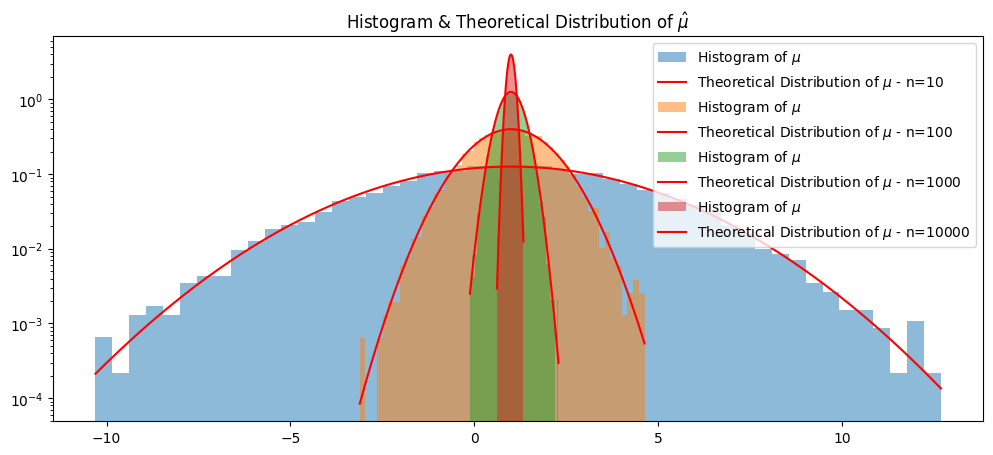

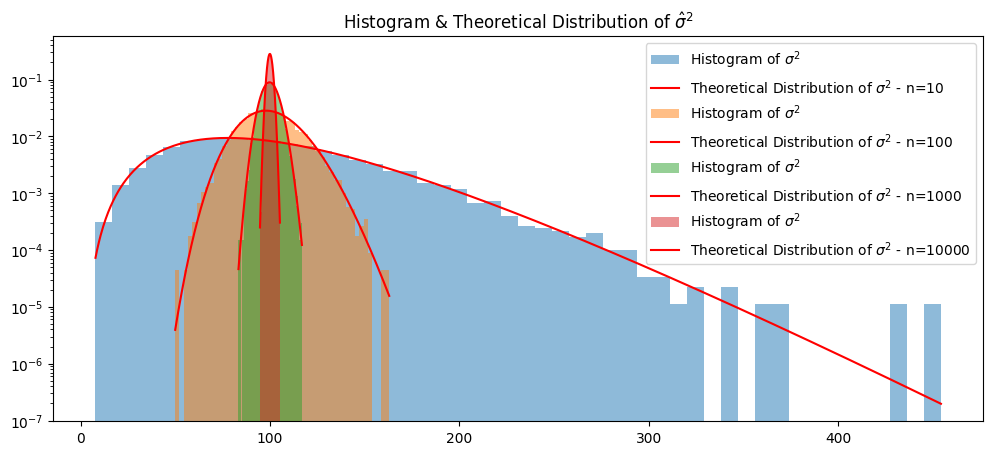

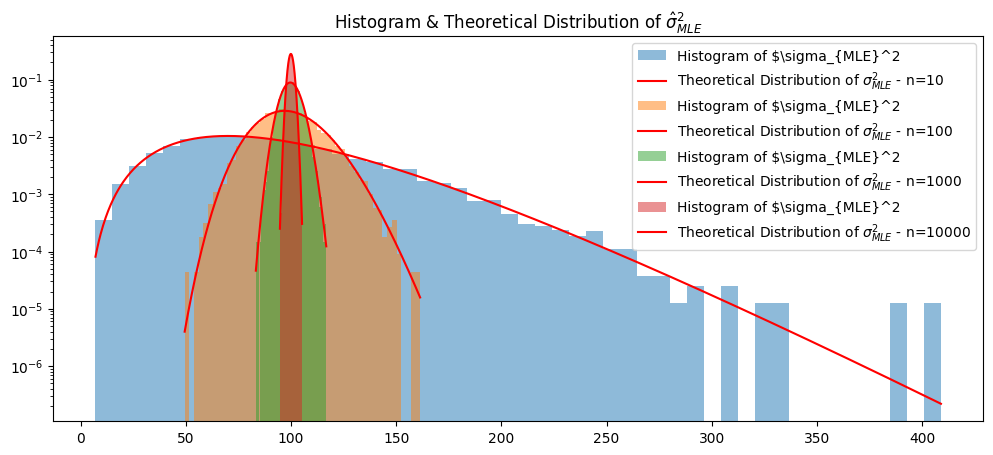

In [28]:
from scipy.stats import chi2

# Number of bins for histograms
num_bins = 50
plt.figure(figsize=(12, 5))
# Plot histograms and theoretical distributions for sigma^2 and sigma^2_MLE
for i, n in enumerate(list_num_samples):
    
     # Histogram for mu
    plt.title(r"Histogram & Theoretical Distribution of $\hat\mu$")
    plt.hist(xmu[i], bins=num_bins, density=True, alpha=0.5, color='C'+str(i), label=r"Histogram of $\mu$")
    
    # Theoretical distribution for mu
    min_xmu, max_xmu = np.min(xmu[i]), np.max(xmu[i])
    x_values_mu = np.linspace(min_xmu, max_xmu, 1000)
    theoretical_distribution_mu = gauss(x_values_mu, mu, sigma**2/n)
    plt.plot(x_values_mu, theoretical_distribution_mu, 'r-', label=r"Theoretical Distribution of $\mu$ -"+f" n={n}")
    
plt.yscale("log")
plt.legend()
plt.show()
    
plt.figure(figsize=(12, 5))
for i,n in enumerate(list_num_samples):
    # Histogram for sigma^2
    plt.title(r"Histogram & Theoretical Distribution of $\hat\sigma^2$")
    plt.hist(xs2[i], bins=num_bins, density=True, alpha=0.5, color='C'+str(i), label=r"Histogram of $\sigma^2$")
    
    # Theoretical distribution for sigma^2
    min_xs2, max_xs2 = min(xs2[i]), max(xs2[i])
    x_values_sigma2 = np.linspace(min_xs2, max_xs2, 1000)
    theoretical_distribution_sigma2 = chi2.pdf([(n - 1) / sigma**2] * x_values_sigma2, df=n - 1)* [(n - 1) / sigma**2]
    plt.plot(x_values_sigma2, theoretical_distribution_sigma2, 'r-', label=r"Theoretical Distribution of $\sigma^2$ -"+f" n={n}")

plt.yscale("log")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for i,n in enumerate(list_num_samples):
    
    # Histogram for sigma^2_MLE
    plt.title(r"Histogram & Theoretical Distribution of $\hat\sigma_{MLE}^2$")
    plt.hist(xs2_mle[i], bins=num_bins, density=True, alpha=0.5, color='C'+str(i), label=r"Histogram of $\sigma_{MLE}^2")
    
    # Theoretical distribution for sigma^2_MLE
    min_xs2_mle, max_xs2_mle = min(xs2_mle[i]), max(xs2_mle[i])
    x_values_sigma2_mle = np.linspace(min_xs2_mle, max_xs2_mle, 1000)
    theoretical_distribution_sigma2_mle = chi2.pdf([n / sigma**2] * x_values_sigma2_mle, df=n - 1)* [n / sigma**2]
    plt.plot(x_values_sigma2_mle, theoretical_distribution_sigma2_mle, "r-", label=r"Theoretical Distribution of $\sigma_{MLE}^2$ -"+f" n={n}")
    
plt.yscale("log")
plt.legend()
plt.show()



### Standard errors

The standard error of an estimator is defined as 

$$\text{SE}(\hat\theta)=\sqrt{\text{Var}(\hat\theta)}$$

In order to compute it exactly, we need to know the sampling distribution of our variable, which is normally unknown but we know it in our case.

**Exercise:** Obtain the theoretical standard error for $\hat\mu$ and $\hat\sigma$. Remain that $\text{Var}(S^2)=\frac{2\sigma^4}{n-1}$. Propose the corresponding estimated standard error.

$SE(\hat\theta)=\sqrt{Var(\hat\theta)}$

### 1. Theoretical Standard Error for $\hat{\mu}$:

Thanks to the previous results, we know that:

$$ \bar{X} \sim \mathcal{N}\left(\mu,\frac{\sigma^2}{n}\right) $$

Then, the variance of the sample mean is:
$$ Var(\bar{X}) = \frac{\sigma^2}{n} $$

Therefore, the theoretical standard error for $\hat\mu$ is:
$$ SE(\hat\mu) = \sqrt{\frac{\sigma^2}{n}} = \frac{\sigma}{\sqrt{n}} $$

### 2. Theoretical Standard Error for $\hat{\sigma^2}$:

Taking into consideration that: 

$$Var(S^2) = \frac{2\sigma^4}{n-1}$$

The theoretical standard error for the sample variance estimator $\hat{\sigma^2}$ is: 

$$ SE(\hat{\sigma^2}) = \sigma^2\sqrt{\frac{2}{n-1}} $$


### 3. Estimated Standard Error:

The proposed estimated standard error for $\hat{\mu}$:

$$ \hat{SE}(\hat\mu) = \frac{S}{\sqrt{n}} $$

The proposed estimated standard error for $\hat{\sigma^2}$:

$$ \hat{SE}(\hat\sigma^2) = S^2\sqrt{\frac{2}{n-1}} $$

where $$ S^2 = \frac{1}{n-1}\sum_{i=1}^{n} (X_{i} - \bar{X})^2 $$


**Exercise:** Compare $\hat\mu$ and $\hat\sigma^2$ estimated for different values of $n$ with the expected error

In [29]:
n=1000

data = np.random.normal(loc=mu, scale=sigma, size=n)
hat_mu, hat_sigma2, hat_sigma2_mle = gaussian_parameters(data)
standard_error_mu = sigma/ np.sqrt(n)
standard_error_sigma2 = np.sqrt(2 * sigma**4 / n)

print("Estimation of mu: {:.4f}".format(hat_mu),"+-{:.4f}".format(standard_error_mu),"True {:.4f}".format(mu))
print("Estimation of sigma^2: {:.4f}".format(hat_sigma2),"+-{:.4f}".format(standard_error_sigma2),"True {:.4f}".format(sigma**2))


Estimation of mu: 0.7128 +-0.3162 True 1.0000
Estimation of sigma^2: 92.6558 +-4.4721 True 100.0000


### Confidence intervals

Confidence intervals are an important tool for estimating the range in which a parameter value lies with a certain degree of confidence. Let us consider a 95% confidence interval to make it even clearer. The interpretation is that if we were to run the same experiment several times, we would expect the true parameter value to lie within this interval 95% of the time, or equivalently, with probability 0.95.

We have established the following relationships for Gaussian variables:

$$\frac{\bar{X}-\mu}{\sqrt{\sigma^2/n}}\sim \mathcal{N}(0,1)$$

$$\frac{(n-1)S^2}{\sigma^2}\sim \chi^2(n-1)$$

By merging these expressions, we derive the distribution for the t-statistic:

$$t=\frac{\bar{X}-\mu}{\hat{\text{SE}}(\bar{X})}=\frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}}}\sim t(n-1),$$

Where \(t(n-1)\) means the t-Student distribution with \(n-1\) degrees of freedom.

This means that our true parameters are expressed as follows:

$$\mu=\bar{X} +\eta \frac{S}{\sqrt{n}}\quad\text{with}\quad\eta\sim t(n-1)$$

$$\sigma^2=\frac{(n-1)S^2}{\eta}\quad\text{with}\quad\eta\sim \chi^2(n-1)$$

Since the probability density functions (pdf) of these $\eta$ are known, we can use these expressions to define an interval in which the estimators will lie with $1-\alpha$ probability. To do this, we need to find the quantiles $ x_{\alpha/2} $ and $x_{1-\alpha/2} $ for each distribution.

Since the t-Student distribution is symmetric,
$$-x_{\alpha/2} = x_{1-\alpha/2} \equiv t_{1-\frac{\alpha}{2}, n-1}$$
and we will use
$$\chi_{\alpha/2}^2(n-1) \text{ and } \chi_{1-\alpha/2}^2(n-1)$$
to represent the quantiles of the $ \chi^2(n-1)$ distribution.

Thus, the confidence intervals (CI) for each estimator are:

$$CI_{1-\alpha}(\mu) = \bar{X} \pm t_{1-\alpha/2, n-1} \frac{S}{\sqrt{n}}$$
$$CI_{1-\alpha}(\sigma^2) = \left( \frac{(n-1)S^2}{\chi_{1-\alpha/2, n-1}^2}, \frac{(n-1)S^2}{\chi_{\alpha/2, n-1}^2} \right)$$

In these expressions, $ CI_{1-\alpha}(\mu)$ and $ CI_{1-\alpha}(\sigma^2)$ denote the confidence intervals for the estimators of $\mu$ and $\sigma^2$, which ensure that the true parameter with a confidence level of $ 1 - \alpha$ is included in these ranges.

**Exercise:** Obtain the 95% confidence intervals for $\mu$ and $\sigma^2$ using a set of $n$ data points. The quantiles of the $t$ and $\chi^2$ distributions we can obtain them using the scipy.stats library, and the function ppf($\alpha$, degrees of freedom) for each that returns the $\alpha$-quantiles.

In [30]:
from scipy.stats import t,chi2
# Estimating standard errors

n=100

data = np.random.normal(loc=mu, scale=sigma, size=n)
hat_mu, hat_sigma2, hat_sigma2_mle = gaussian_parameters(data)


# Calculating 95% confidence intervals
confidence_level = 0.5
alpha=1-confidence_level

hat_standard_error_mu = np.sqrt(hsigma2/n)
# degrees of freedom
df = n - 1  

quantile_t= t.ppf(1-alpha/2, df)

lower_quantile_chi=chi2.ppf(alpha/2, df)
higher_quantile_chi= chi2.ppf(1-alpha/2, df)
ci_mu = (hmu - quantile_t * hat_standard_error_mu, hmu + quantile_t * hat_standard_error_mu)
ci_sigma2 = (df * hsigma2 / higher_quantile_chi, df * hsigma2 / lower_quantile_chi)

print("{:.2f}% CI for mu: ({:.4f}, {:.4f})".format(confidence_level ,ci_mu[0], ci_mu[1]))
print("{:.2f}% CI for sigma^2: ({:.4f}, {:.4f})".format(confidence_level ,ci_sigma2[0], ci_sigma2[1]))



0.50% CI for mu: (0.2262, 1.5780)
0.50% CI for sigma^2: (91.2965, 110.6571)


**Exercise:** We can now verify that the true value of the parameters in the CI thus obtained is indeed with probability$1-\alpha$ by repeating the same experiment $N=10000$. Each time we calculate the CI and check whether it contains the true values or not. Then we calculate the frequency with which it is contained. Try different confidence levels.

In [31]:
#  Counters to track how many times the confidence interval contains the true values of mu and sigma^2. 
n_mu=0
n_sigma2=0

# Total number of experiments
N=1000

confidence_level = 0.75
alpha = 1 - confidence_level

for i in range(N):
    
    # Data of 100 samples
    n=100
    data = np.random.normal(loc=mu, scale=sigma, size=n)
    
    # Estimators
    hat_mu, hat_sigma2, hat_sigma2_mle = gaussian_parameters(data)
    hat_standard_error_mu = np.sqrt(hsigma2 / n)
    
    # Degrees of freedom
    df = n - 1
    
    # Quantiles, lower and higher
    quantile_t = t.ppf(1 - alpha/2, df)
    lower_quantile_chi = chi2.ppf(alpha/2, df)
    higher_quantile_chi = chi2.ppf(1 - alpha/2, df)

    # Confidence Intervals
    ci_mu = (hat_mu - quantile_t * hat_standard_error_mu, hat_mu + quantile_t * hat_standard_error_mu)
    ci_sigma2 = (df * (hat_sigma2 / higher_quantile_chi), df * (hat_sigma2 / lower_quantile_chi))
    
    # Containment Frequency
    if ci_mu[0] <= mu and mu <= ci_mu[1]:
        n_mu += 1
        
    if ci_sigma2[0] <= sigma**2 and sigma**2 <= ci_sigma2[1]:
        n_sigma2 += 1
        
print(r'mu is contained with a frequency {:.2f}'.format(n_mu/N))
print(r'sigma2 is contained with a frequency {:.2f}'.format(n_sigma2/N))


mu is contained with a frequency 0.73
sigma2 is contained with a frequency 0.78



## Bootstrap Method:

Bootstrap is a resampling method that allows us to approximate the sampling distribution of any estimator/statistic. It works on the principle that the empirical distribution (observed data) is the best representation we have of the true distribution of the population.

#### Detailed Steps:

1. **New Sample**:

 For observed data, we draw $n$ samples **with replacement**. This means that a single data point may be selected more than once, and some data points may not be selected at all. This redrawn data set is called the bootstrap sample. From this bootstrap sample, we compute the estimator (call it $\hat\theta^* $).

2. **Repeat**:

 We repeat the above step $B$ times, resulting in $B$ bootstrap samples. For each of these samples, we compute a different $ \hat\theta^{*(b)} $. This gives us $ B$ different estimators based on the bootstrap samples.

3. **Bootstrap sampling distribution**:

 The collection of all $ \hat\theta^{*(b)} $ values gives us an empirical representation of the sampling distribution of $ \hat\theta $. It is empirical because it is derived from our actual data.

4. **Approximation to the sampling law**:

 This step is the basis for making the bootstrap method work. The main idea is that the differences between the bootstrap estimates $ \hat\theta^{*(b)} $ and the original estimate $ \hat\theta $ approximate the differences we would expect between the estimator $\hat\theta$ and the true parameter $\theta$. Mathematically, this is expressed as follows:
 $$\text{Law} (\hat\theta-\theta) \approx \text{Bootstrap sampling law}(\hat\theta^{*(b)}-\hat\theta) $$
 
 If you increase $ B $, this approximation becomes better.

5. **Empirical Bootstrap Quantiles**:

 Here we try to find the percentiles of the bootstrap distribution that contain the middle $(1-\alpha) $ fraction of the data. More specifically, the $(1-\alpha/2)$ quantiles (for a $(1-\alpha)$ confidence level).

 To illustrate: Suppose you have 1000 bootstrap estimates. At a 95% confidence level, you would sort these estimates and take the 25th and 975th estimates as your $\alpha/2$ and $(1-\alpha) $ estimates, respectively. $(1-\alpha/2)$ quantile, respectively.

6. **Define Confidence Interval**:

 And now for the derivation of this confidence interval:

 Consider the difference between the original estimate, \( \hat\theta \), and the bootstrap estimates, $ \hat\theta^*$. If we assume that the estimator is symmetrically distributed about the true parameter value (a common assumption), then we would expect the original estimate, $\hat\theta$, to be as far above the true parameter, $ \theta $, as the bootstrap estimate, $\hat\theta^* $ is above $ \hat\theta$. This is the reason for the "reflection" in the confidence interval:
 $$IC (\theta) = \left[ 2\hat\theta - b^*_{1-\alpha/2}, 2\hat\theta - b^*_{\alpha/2} \right]$$

 The reflection ensures that the variability and potential bias captured by the bootstrap samples are correctly reflected in the confidence interval.

**Exercise** Obtain the confidence interval for $\mu$ and $\sigma^2$ using Boostrap.

In [32]:

def bootstrap_estimates(original_data, alpha, num_bootstrap_samples=1000):
    
    n = len(original_data)
    hat_mu, hat_sigma2, _ = gaussian_parameters(original_data)
    
    hat_mu_bootstrap = np.zeros(num_bootstrap_samples)
    hat_sigma2_bootstrap = np.zeros(num_bootstrap_samples)
    
    for i in range(num_bootstrap_samples): # Generate a bootstrap sample
        bootstrap_sample = np.random.choice(original_data, size=n, replace=True)
        hat_mu_bootstrap[i], hat_sigma2_bootstrap[i], _ = gaussian_parameters(bootstrap_sample)
    
    lower_quantile_mu = np.percentile(hat_mu_bootstrap, alpha/2*100)
    higher_quantile_mu = np.percentile(hat_mu_bootstrap, (1-alpha/2)*100)
    
    ci_b_mu = (2*hat_mu - higher_quantile_mu, 2*hat_mu - lower_quantile_mu)
    
    lower_quantile_sigma2 = np.percentile(hat_sigma2_bootstrap, alpha/2*100)
    higher_quantile_sigma2 = np.percentile(hat_sigma2_bootstrap, (1-alpha/2)*100)
    ci_b_sigma2 = (2*hat_sigma2 - higher_quantile_sigma2, 2*hat_sigma2 - lower_quantile_sigma2)
    
    return ci_b_mu, ci_b_sigma2



confidence_level=0.95
alpha=1-confidence_level
ci_mu_bootstrap, ci_sigma2_bootstrap = bootstrap_estimates(data, alpha)

print("Bootstrap {:.2f}% CI for mu: ({:.2f}, {:.2f})".format(100*(1-alpha), ci_mu_bootstrap[0], ci_mu_bootstrap[1]))
print("Bootstrap {:.2f}% CI for sigma^2: ({:.2f}, {:.2f})".format(100*(1-alpha), ci_sigma2_bootstrap[0], ci_sigma2_bootstrap[1]))


Bootstrap 95.00% CI for mu: (-0.60, 2.98)
Bootstrap 95.00% CI for sigma^2: (59.51, 100.57)


**Exercise** Check that we obtain very similar CIs that those obtained before using the properties of the Gaussian random variables

In [33]:
print("{:.2f}% CI for mu: ({:.4f}, {:.4f})".format(confidence_level ,ci_mu[0], ci_mu[1]))
print("{:.2f}% CI for sigma^2: ({:.4f}, {:.4f})".format(confidence_level ,ci_sigma2[0], ci_sigma2[1]))

0.95% CI for mu: (0.0728, 2.3834)
0.95% CI for sigma^2: (67.8051, 94.1424)
